In [67]:
import numpy as np
from time import time, sleep
from math import atan2, log10
from numpy import cos, sin, conjugate, sqrt

import cv2
import pylab as pl
from pylab import gray 
from matplotlib import cm
import matplotlib.pyplot as plt

print( "import completed.")

import completed.


The original image ...


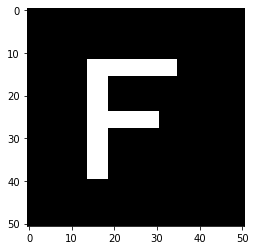

In [53]:
# image reconsturcion demo

print( "The original image ..." )

path = 'gl5un.png'
#path = 'dog_image.jpg'

img = cv2.imread(path, 0)

plt.imshow( img, cmap="gray" )
plt.show()

In [45]:
# function define

def _slow_zernike_poly(Y,X,n,l):
    def _polar(r,theta):
        x = r * cos(theta)
        y = r * sin(theta)
        
        return 1.*x+1.j*y
    pass

    facts = { } 
    def factorial(n) :
        if n <= 1 :
            return 1 ; 
        pass
    
        if n in facts :
            return facts[n]
        pass
    
        f = n*factorial(n -1) 
        facts[n] = f;
        
        return f
    pass

    y, x = Y[0], X[0]
    vxy = np.zeros(Y.size, dtype=complex)
    
    for index, (x, y) in enumerate( zip(X,Y) ):
        Vnl = 0.
        
        for m in range( int( (n-l)//2 ) + 1 ):
            Vnl += (-1.)**m *factorial(n-m) /  \
                ( factorial(m) * factorial((n - 2*m + l) // 2) * factorial((n - 2*m - l) // 2) ) * \
                ( sqrt(x*x + y*y)**(n - 2*m) * _polar(1.0, l*atan2(y,x)) )
        pass
    
        vxy[index] = Vnl
    pass

    return vxy
pass # -- _slow_zernike_poly

def zernike_reconstruct(img, D):

    shape = img.shape
    
    radius = max( img.shape[0], img.shape[1] )//2 
    
    row = shape[0]
    col = shape[1]
    
    idx = np.ones(shape)
    
    cofy = row/2.0
    cofx = col/2.0
    
    radius = radius + 0.0
    
    print( f"The image reconstruction order = { d }, radius = {radius}")

    Y, X = np.where(idx > 0)
    P = img[Y,X].ravel()
    
    Yn = ( (Y -cofy)/radius).ravel()
    Xn = ( (X -cofx)/radius).ravel()

    k = (np.sqrt(Xn**2 + Yn**2) <= 1.)
    frac_center = np.array(P[k], np.double)
    
    Yn = Yn[k]
    Xn = Xn[k]
    frac_center = frac_center.ravel()

    # in the discrete case, the normalization factor is not pi but the number of pixels 
    # within the unit disk
    
    npix = float(frac_center.size)

    reconstr = np.zeros(img.size, dtype=complex)
    accum = np.zeros(Yn.size, dtype=complex)

    for n in range(D+1):
        for l in range(n+1):
            if (n-l)%2 == 0:
                # get the zernike polynomial
                vxy = _slow_zernike_poly(Yn, Xn, float(n), float(l))
                # project the image onto the polynomial and calculate the moment
                a = sum(frac_center * conjugate(vxy)) * (n + 1)/npix
                # reconstruct
                accum += a * vxy
            pass
        pass
    pass

    reconstr[k] = accum
    
    return reconstr
pass # -- zernike_reconstruct

print( "functions are defined.")

functions are defined.


Calculating moments ....
gax = 255
The image reconstruction order = 5, radius = 25.0
Done. elapsed = 0.468
gax = 255
avg = 0.19159110073155813, mse = 3828.07856332345, psnr = -35.83
The image reconstruction order = 10, radius = 25.0


<ipython-input-92-4a58f3111372>:37: RuntimeWarning: overflow encountered in ubyte_scalars
  psnr = 10*log10(gmax*gmax/mse)


Done. elapsed = 2.148
gax = 255
avg = 0.19159110073155813, mse = 3006.2921039166367, psnr = -34.78
The image reconstruction order = 15, radius = 25.0
Done. elapsed = 5.764
gax = 255
avg = 0.19159110073155813, mse = 1995.0231120039841, psnr = -33.00
The image reconstruction order = 20, radius = 25.0
Done. elapsed = 11.585
gax = 255
avg = 0.19159110073155813, mse = 1743.7561851795456, psnr = -32.41
The image reconstruction order = 25, radius = 25.0
Done. elapsed = 20.446
gax = 255
avg = 0.19159110073155813, mse = 1501.775615721473, psnr = -31.77


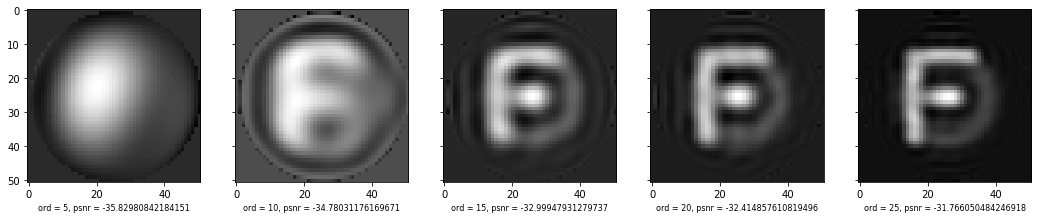

Good bye!


In [92]:
print( "Calculating moments ...." )

row_cnt = 1
col_cnt = 5
cnt = row_cnt*col_cnt

gmax = np.max( img )

print( f"gax = {gmax}" )

fig, axs = plt.subplots(row_cnt, col_cnt, figsize=(18, 18), sharey=True) 
fig_idx = 0 

for idx, d in enumerate( range( 5, 5*cnt + 5, 5 ) ) : 
    then = time()
    
    reconst = zernike_reconstruct(img, d)

    reconst = reconst.reshape( img.shape )
    
    now = time()
    
    elapsed = now - then
    print( f"Done. elapsed = {elapsed:.3f}" )
    
    #img_reconst_abs = np.absolute( reconst )
    img_reconst = reconst.real
    
    ax = axs[fig_idx]
    
    img_diff = img - img_reconst
    
    #gmax = np.max( img_reconst ) # 복원된 이미지의 회색조 최대값 
    
    mse = np.sum( np.square( img_diff ) )/(img_diff.shape[0]*img_diff.shape[1])
    
    psnr = 10*log10(gmax*gmax/mse)
    
    print( f"gax = {gmax}" )    
    print( f"avg = {avg}, mse = {mse}, psnr = {psnr:.2f}" )
    
    ax.imshow( img_reconst, cmap="gray", origin = 'upper')
    ax.set_xlabel( f'ord = {d}, psnr = {psnr}', fontsize=8)  
    
    fig_idx += 1
pass

plt.show()

print( "Good bye!" )